In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
# read date from csv file
data = pd.read_csv('fatigue_data.csv', index_col='Sl. No.')

# delete extra columns
xx = data.drop(data.columns[17:20], axis=1)
xx.head()

,NT,THT,THt2,THQCr,CT,Ct3,DT,Dt4,QmT,TT,Tt5,TCr,C,Ni,Cr,Mo,Fatigue
Sl. No.,,,,,,,,,,,,,,,,,
1,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.01,0.02,0.0,232
2,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.25,0.08,0.12,0.0,235
3,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.02,0.03,0.0,235
4,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.26,0.01,0.02,0.0,241
5,885,30,0,0,30,0.0,30.0,0.0,30,30,0,0.0,0.22,0.01,0.02,0.0,225


In [3]:
# set X as columns C, Ni, Cr and Mo (No.16-19)
X = data.drop(data.columns[16:20], axis=1) 
# set y as 'Fatigue' column (No.17)
y = data['Fatigue']

X.shape, y.shape

((437, 16), (437,))

In [4]:
# splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# simple linear regression model
lr = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [14]:
# plot predicted and original results
def metrics_plot(y1, y2):
    #calculate metrics
    mae = mean_absolute_error(y1, y2)
    mse = mean_squared_error(y1, y2)
    rmse = math.sqrt(mse)
    r2 = r2_score(y1, y2)
    
    #output metrics
    print('MSE:  {}'.format(round(mse, 3)))
    print('RMSE: {}'.format(round(rmse, 3)))
    print('MAE:  {}'.format(round(mae, 3)))
    print('R2:   {}'.format(round(r2, 3)))

    #plot graph
    plt.figure(figsize=(8,8))

    plt.plot(y1, y2, 'co')
    plt.plot([100,1500], [100,1500], color='black', linewidth=2.0, linestyle='-')
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.xlim((100,1500))
    plt.ylim((100,1500))
    
    my_x_ticks = np.arange(100,1600,200)
    my_y_ticks = np.arange(100, 1600, 200)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.axis('scaled')
    
    plt.show()
    return mse, rmse, mae, r2

MSE:  1243.081
RMSE: 35.257
MAE:  24.817
R2:   0.97


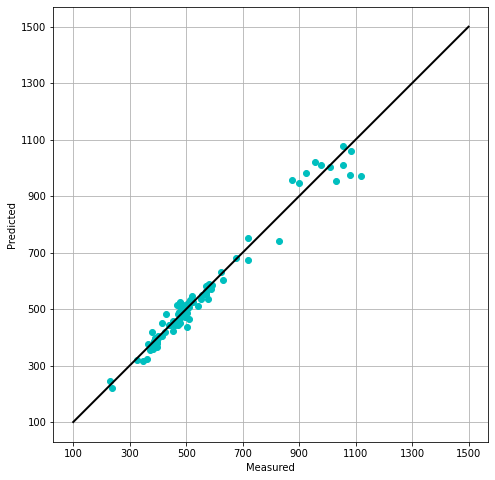

In [15]:
m1,m2,m3,m4 = metrics_plot(y_test, y_pred)